# DC Metro area 2018-2021 Mortality data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
mortality_df = pd.read_csv('./Mortality data/Current Final Multiple Cause of Death Data/DCMetroDeaths_2018_2021.csv')

In [4]:
mortality_df['County Code'] = mortality_df['County Code'].astype(str)

In [5]:
mortality_df

,State,County,County Code,Year,Year Code,Deaths,Population,Crude Rate
0,WV,"Barbour County, WV",54001,2018,2018,Suppressed,16535,Suppressed
1,WV,"Barbour County, WV",54001,2019,2019,Suppressed,16441,Suppressed
2,WV,"Barbour County, WV",54001,2020,2020,Suppressed,16444,Suppressed
3,WV,"Barbour County, WV",54001,2021,2021,Suppressed,15468,Suppressed
4,WV,"Berkeley County, WV",54003,2018,2018,68,117123,58.1
...,...,...,...,...,...,...,...,...
847,MD,"Baltimore city, MD",24510,2021,2021,893,576498,154.9
848,DC,"District of Columbia, DC",11001,2018,2018,266,702455,37.9
849,DC,"District of Columbia, DC",11001,2019,2019,319,705749,45.2
850,DC,"District of Columbia, DC",11001,2020,2020,432,712816,60.6


In [6]:
mortality_df_2018 = mortality_df[mortality_df['Year']==2018]

In [7]:
mortality_df_2019 = mortality_df[mortality_df['Year']==2019]

In [8]:
mortality_df_2020 = mortality_df[mortality_df['Year']==2020]

In [9]:
mortality_df_2021 = mortality_df[mortality_df['Year']==2021]

In [10]:
mortality_df_2018

,State,County,County Code,Year,Year Code,Deaths,Population,Crude Rate
0,WV,"Barbour County, WV",54001,2018,2018,Suppressed,16535,Suppressed
4,WV,"Berkeley County, WV",54003,2018,2018,68,117123,58.1
8,WV,"Boone County, WV",54005,2018,2018,24,21951,109.3
12,WV,"Braxton County, WV",54007,2018,2018,Suppressed,14089,Suppressed
16,WV,"Brooke County, WV",54009,2018,2018,Suppressed,22203,Suppressed
...,...,...,...,...,...,...,...,...
832,MD,"Washington County, MD",24043,2018,2018,89,150926,59
836,MD,"Wicomico County, MD",24045,2018,2018,35,103195,33.9
840,MD,"Worcester County, MD",24047,2018,2018,18,51823,Unreliable
844,MD,"Baltimore city, MD",24510,2018,2018,691,602495,114.7


In [11]:
metro_df = gpd.read_file('./DC_Metro_counties/Washington_Arlington_Alexandria_DC_VA_MD_WV_Counties.shp')

In [12]:
#metro_df

In [13]:
metro_df['deaths_2018'] = np.nan
metro_df['population_2018'] = np.nan

In [14]:
metro_df['deaths_2019'] = np.nan
metro_df['population_2019'] = np.nan
metro_df['deaths_2020'] = np.nan
metro_df['population_2020'] = np.nan
metro_df['deaths_2021'] = np.nan
metro_df['population_2021'] = np.nan

In [15]:
for index, row in metro_df.iterrows():
    geoid = row['GEOID']
    
    # Find the corresponding row in mortality_df_2018 DataFrame based on County Code
    matching_row = mortality_df_2018[mortality_df_2018['County Code'] == geoid]
    
    # If a matching row is found, update 'Deaths' and 'Population' columns in original DataFrame
    if not matching_row.empty:
        metro_df.at[index, 'deaths_2018'] = matching_row['Deaths'].values[0]
        metro_df.at[index, 'population_2018'] = matching_row['Population'].values[0]
    else:
        # If no match is found, you can handle this case accordingly, for example, set NaN or 0.
        metro_df.at[index, 'deaths_2018'] = None
        metro_df.at[index, 'population_2018'] = None

In [16]:
for index, row in metro_df.iterrows():
    geoid = row['GEOID']
    
    # Find the corresponding row in mortality_df_2018 DataFrame based on County Code
    matching_row = mortality_df_2019[mortality_df_2019['County Code'] == geoid]
    
    # If a matching row is found, update 'Deaths' and 'Population' columns in original DataFrame
    if not matching_row.empty:
        metro_df.at[index, 'deaths_2019'] = matching_row['Deaths'].values[0]
        metro_df.at[index, 'population_2019'] = matching_row['Population'].values[0]
    else:
        # If no match is found, you can handle this case accordingly, for example, set NaN or 0.
        metro_df.at[index, 'deaths_2019'] = None
        metro_df.at[index, 'population_2019'] = None

In [17]:
for index, row in metro_df.iterrows():
    geoid = row['GEOID']
    
    # Find the corresponding row in mortality_df_2018 DataFrame based on County Code
    matching_row = mortality_df_2020[mortality_df_2020['County Code'] == geoid]
    
    # If a matching row is found, update 'Deaths' and 'Population' columns in original DataFrame
    if not matching_row.empty:
        metro_df.at[index, 'deaths_2020'] = matching_row['Deaths'].values[0]
        metro_df.at[index, 'population_2020'] = matching_row['Population'].values[0]
    else:
        # If no match is found, you can handle this case accordingly, for example, set NaN or 0.
        metro_df.at[index, 'deaths_2020'] = None
        metro_df.at[index, 'population_2020'] = None

In [18]:
for index, row in metro_df.iterrows():
    geoid = row['GEOID']
    
    # Find the corresponding row in mortality_df_2018 DataFrame based on County Code
    matching_row = mortality_df_2021[mortality_df_2021['County Code'] == geoid]
    
    # If a matching row is found, update 'Deaths' and 'Population' columns in original DataFrame
    if not matching_row.empty:
        metro_df.at[index, 'deaths_2021'] = matching_row['Deaths'].values[0]
        metro_df.at[index, 'population_2021'] = matching_row['Population'].values[0]
    else:
        # If no match is found, you can handle this case accordingly, for example, set NaN or 0.
        metro_df.at[index, 'deaths_2021'] = None
        metro_df.at[index, 'population_2021'] = None

In [19]:
metro_df

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,C_Status,geometry,deaths_2018,population_2018,deaths_2019,population_2019,deaths_2020,population_2020,deaths_2021,population_2021
0,734,54,037,01550025,54037,Jefferson,Jefferson County,06,H1,G4020,...,Outlying,"POLYGON ((-78.03541 39.27841, -78.03526 39.278...",25,56811.0,28,57146.0,33,57486.0,29,58370.0
1,1266,24,009,01676636,24009,Calvert,Calvert County,06,H1,G4020,...,Outlying,"POLYGON ((-76.56813 38.40771, -76.57181 38.408...",40,92003.0,36,92525.0,33,93072.0,35,93928.0
2,1297,24,033,01714670,24033,Prince George's,Prince George's County,06,H1,G4020,...,Central,"POLYGON ((-77.04202 38.74672, -77.04191 38.750...",143,909308.0,168,909327.0,227,909612.0,213,955306.0
3,1299,24,017,01676992,24017,Charles,Charles County,06,H1,G4020,...,Outlying,"POLYGON ((-77.25505 38.56524, -77.25442 38.567...",35,161503.0,46,163257.0,60,164436.0,49,168698.0
4,1310,24,021,01711211,24021,Frederick,Frederick County,06,H1,G4020,...,Outlying,"POLYGON ((-77.62017 39.48470, -77.61951 39.485...",85,255648.0,71,259547.0,80,265161.0,52,279835.0
5,1465,51,113,01494590,51113,Madison,Madison County,06,H1,G4020,...,NaN,"POLYGON ((-78.43903 38.51684, -78.43899 38.516...",Suppressed,13295.0,Suppressed,13261.0,Suppressed,13312.0,Suppressed,13942.0
6,1474,51,157,01673976,51157,Rappahannock,Rappahannock County,06,H1,G4020,...,Outlying,"POLYGON ((-78.26237 38.75855, -78.26209 38.758...",0,7252.0,Suppressed,7370.0,Suppressed,7260.0,Suppressed,7407.0
7,1478,51,510,01498415,51510,Alexandria,Alexandria city,25,C7,G4020,...,Central,"POLYGON ((-77.14184 38.82552, -77.14177 38.825...",Suppressed,160530.0,22,159428.0,24,158726.0,27,154706.0
8,1489,51,685,01498431,51685,Manassas Park,Manassas Park city,25,C7,G4020,...,Central,"POLYGON ((-77.47883 38.78259, -77.47528 38.786...",0,17307.0,Suppressed,17478.0,Suppressed,18004.0,Suppressed,17002.0
9,1501,51,600,01789070,51600,Fairfax,Fairfax city,25,C7,G4020,...,Central,"POLYGON ((-77.33485 38.85374, -77.33480 38.853...",Suppressed,24574.0,Suppressed,24019.0,Suppressed,23429.0,Suppressed,24276.0


In [20]:
suppressed_counts = metro_df[['deaths_2018','deaths_2019','deaths_2020','deaths_2021']].apply(lambda col: col.str.count('Suppressed')).sum()

In [21]:
suppressed_counts

deaths_2018    6
deaths_2019    6
deaths_2020    4
deaths_2021    5
dtype: int64

In [22]:
metro_df[metro_df['deaths_2018'] == 'Suppressed']

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,C_Status,geometry,deaths_2018,population_2018,deaths_2019,population_2019,deaths_2020,population_2020,deaths_2021,population_2021
5,1465,51,113,01494590,51113,Madison,Madison County,06,H1,G4020,...,NaN,"POLYGON ((-78.43903 38.51684, -78.43899 38.516...",Suppressed,13295.0,Suppressed,13261.0,Suppressed,13312.0,Suppressed,13942.0
7,1478,51,510,01498415,51510,Alexandria,Alexandria city,25,C7,G4020,...,Central,"POLYGON ((-77.14184 38.82552, -77.14177 38.825...",Suppressed,160530.0,22,159428.0,24,158726.0,27,154706.0
9,1501,51,600,01789070,51600,Fairfax,Fairfax city,25,C7,G4020,...,Central,"POLYGON ((-77.33485 38.85374, -77.33480 38.853...",Suppressed,24574.0,Suppressed,24019.0,Suppressed,23429.0,Suppressed,24276.0
11,1515,51,610,01498423,51610,Falls Church,Falls Church city,25,C7,G4020,...,Central,"POLYGON ((-77.19423 38.88615, -77.19400 38.886...",Suppressed,14772.0,0,14617.0,0,14631.0,12,14493.0
19,1728,51,683,01498430,51683,Manassas,Manassas city,25,C7,G4020,...,Central,"POLYGON ((-77.52631 38.73252, -77.52539 38.732...",Suppressed,41641.0,13,41085.0,12,40869.0,24,42708.0
20,1745,51,043,01690562,51043,Clarke,Clarke County,06,H1,G4020,...,Outlying,"POLYGON ((-78.15153 39.03698, -78.15146 39.037...",Suppressed,14523.0,Suppressed,14619.0,0,14622.0,Suppressed,14881.0


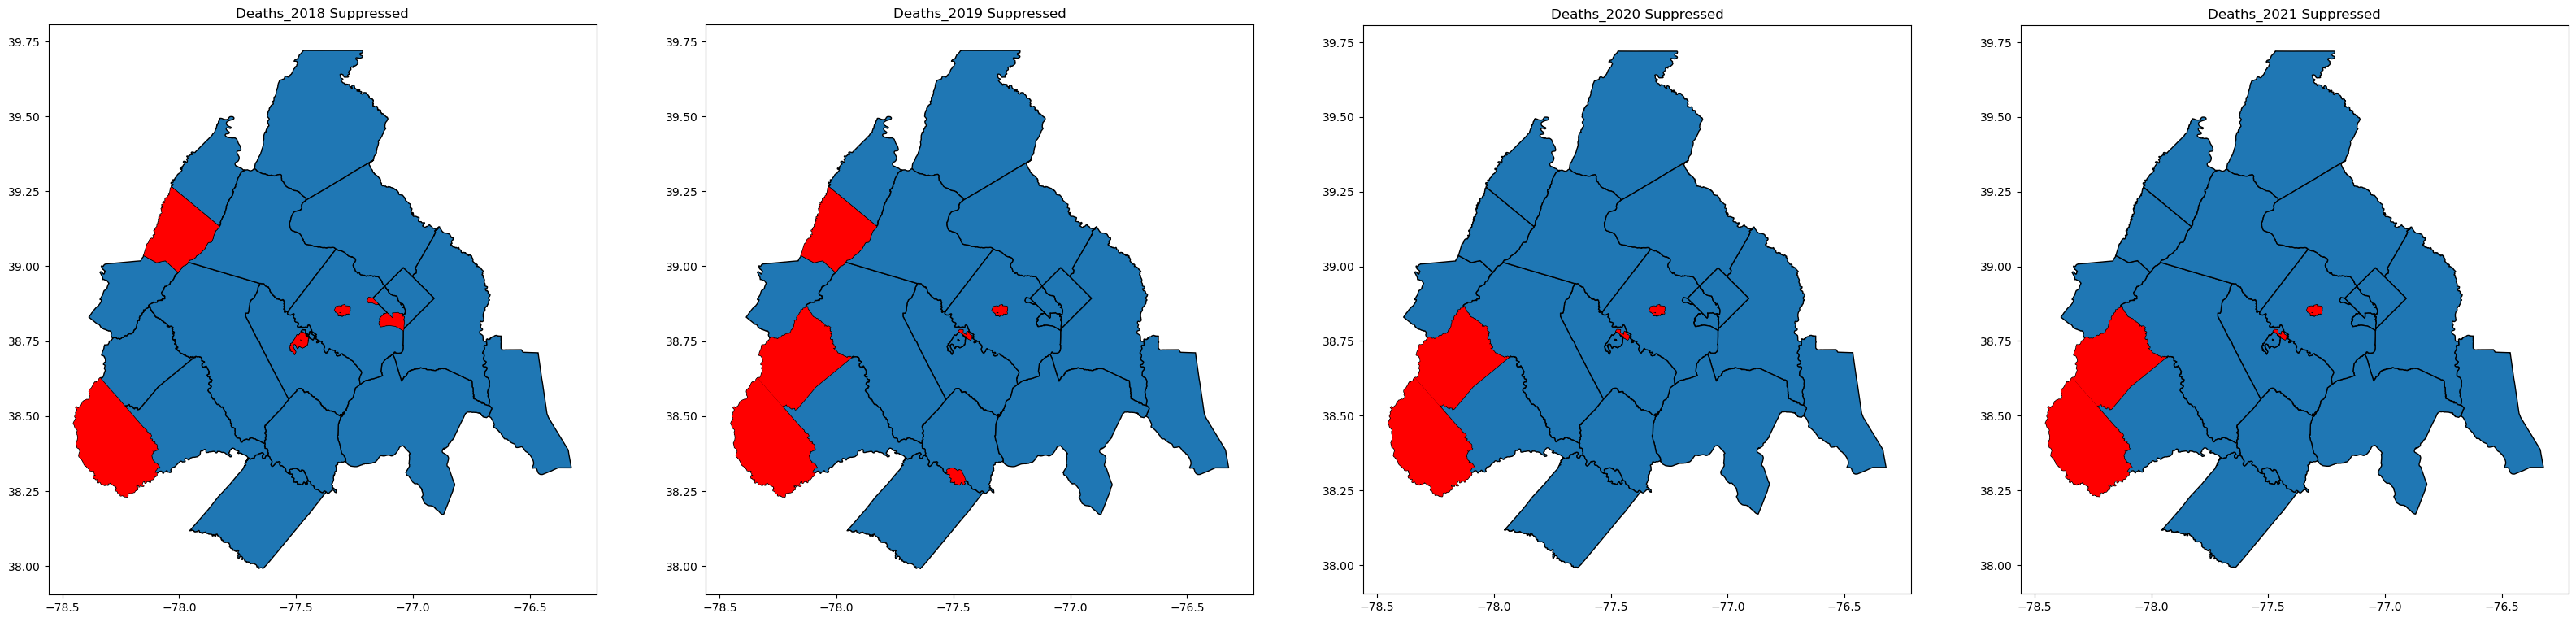

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(40, 10))


suppressed_deaths_2018 = metro_df[metro_df['deaths_2018'] == 'Suppressed']
metro_df.plot(ax=axes[0], edgecolor='black', linewidth=1)
suppressed_deaths_2018.plot(ax=axes[0], color='red', legend=True)
axes[0].set_title('Deaths_2018 Suppressed')

suppressed_deaths_2019 = metro_df[metro_df['deaths_2019'] == 'Suppressed']
metro_df.plot(ax=axes[1], edgecolor='black', linewidth=1)
suppressed_deaths_2019.plot(ax=axes[1], color='red', legend=True)
axes[1].set_title('Deaths_2019 Suppressed')

suppressed_deaths_2020 = metro_df[metro_df['deaths_2020'] == 'Suppressed']
metro_df.plot(ax=axes[2], edgecolor='black', linewidth=1)
suppressed_deaths_2020.plot(ax=axes[2], color='red', legend=True)
axes[2].set_title('Deaths_2020 Suppressed')


suppressed_deaths_2021 = metro_df[metro_df['deaths_2021'] == 'Suppressed']
metro_df.plot(ax=axes[3], edgecolor='black', linewidth=1)
suppressed_deaths_2020.plot(ax=axes[3], color='red', legend=True)
axes[3].set_title('Deaths_2021 Suppressed')

# Display the plots
plt.show()

In [75]:
columns_to_replace = ['deaths_2018', 'deaths_2019', 'deaths_2020', 'deaths_2021']
metro_df[columns_to_replace] = metro_df[columns_to_replace].replace('Suppressed', 5)

In [76]:
# If the columns contain numeric values, you might want to convert them to numeric types after replacement
metro_df[columns_to_replace] = metro_df[columns_to_replace].apply(pd.to_numeric)

In [77]:
metro_df[columns_to_replace] = metro_df[columns_to_replace].apply(pd.to_numeric)

<Figure size 2000x2000 with 0 Axes>

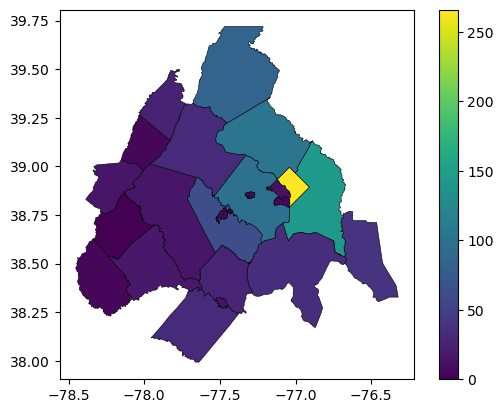

In [37]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Plot the data
metro_df.plot(column='deaths_2018',legend=True, edgecolor='black', linewidth=.4)

# Display the plot
plt.show()

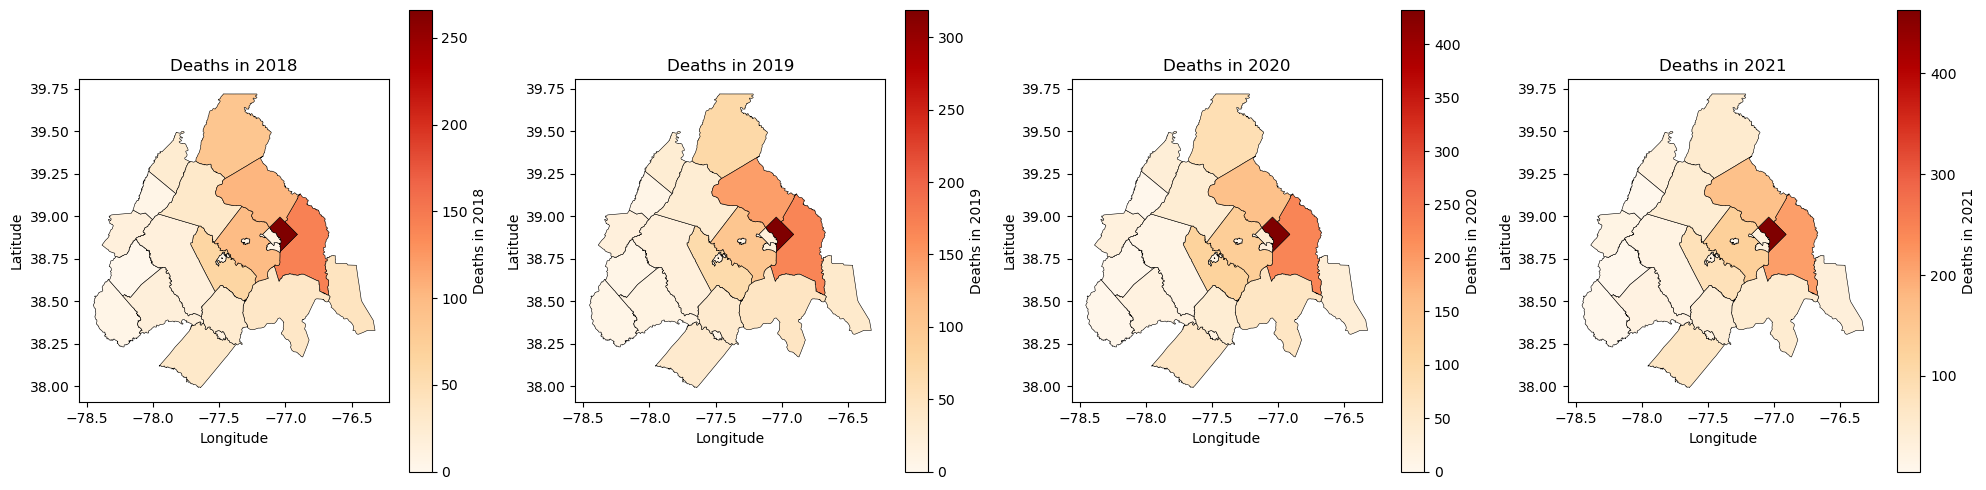

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming metro_df is a GeoDataFrame with geometry column and 'deaths_2018', 'deaths_2019', 'deaths_2020', 'deaths_2021' data

# Set the figure size and create subplots in a horizontal arrangement
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot the data for each year horizontally
for i, year in enumerate(['deaths_2018', 'deaths_2019', 'deaths_2020', 'deaths_2021']):
    metro_df.plot(column=year, cmap='OrRd', legend=True, legend_kwds={'label': f'Deaths in {year[-4:]}'},
                  edgecolor='black', linewidth=0.4, ax=axs[i])
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_title(f'Deaths in {year[-4:]}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [40]:
metro_df['deaths_per_100k_2018'] = (metro_df['deaths_2018'] / metro_df['population_2018']) * 100000
metro_df['deaths_per_100k_2019'] = (metro_df['deaths_2019'] / metro_df['population_2019']) * 100000
metro_df['deaths_per_100k_2020'] = (metro_df['deaths_2020'] / metro_df['population_2020']) * 100000
metro_df['deaths_per_100k_2021'] = (metro_df['deaths_2021'] / metro_df['population_2021']) * 100000

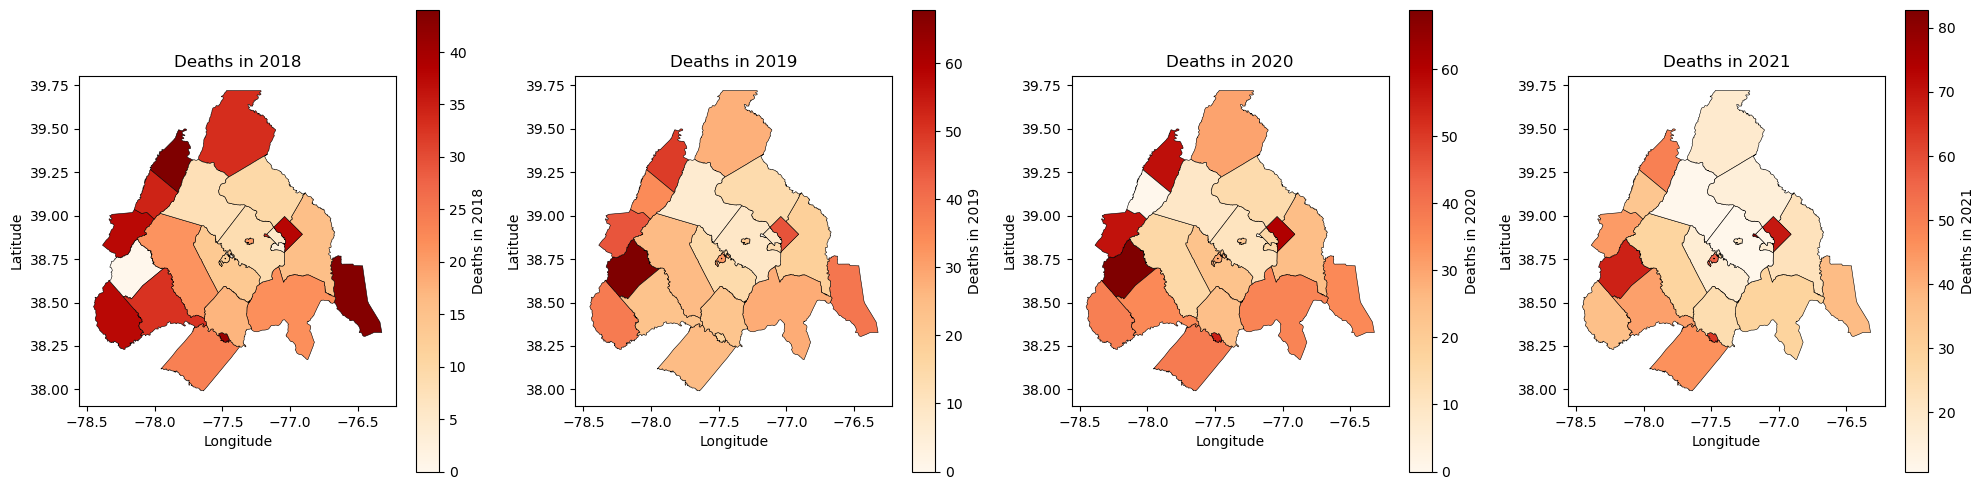

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming metro_df is a GeoDataFrame with geometry column and 'deaths_2018', 'deaths_2019', 'deaths_2020', 'deaths_2021' data

# Set the figure size and create subplots in a horizontal arrangement
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot the data for each year horizontally
for i, year in enumerate(['deaths_per_100k_2018', 'deaths_per_100k_2019', 'deaths_per_100k_2020', 'deaths_per_100k_2021']):
    metro_df.plot(column=year, cmap='OrRd', legend=True, legend_kwds={'label': f'Deaths in {year[-4:]}'},
                  edgecolor='black', linewidth=0.4, ax=axs[i])
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_title(f'Deaths in {year[-4:]}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [26]:
metro_df.head(3)

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,...,C_Status,geometry,deaths_2018,population_2018,deaths_2019,population_2019,deaths_2020,population_2020,deaths_2021,population_2021
0,734,54,037,01550025,54037,Jefferson,Jefferson County,06,H1,G4020,...,Outlying,"POLYGON ((-78.03541 39.27841, -78.03526 39.278...",25,56811.0,28,57146.0,33,57486.0,29,58370.0
1,1266,24,009,01676636,24009,Calvert,Calvert County,06,H1,G4020,...,Outlying,"POLYGON ((-76.56813 38.40771, -76.57181 38.408...",40,92003.0,36,92525.0,33,93072.0,35,93928.0
2,1297,24,033,01714670,24033,Prince George's,Prince George's County,06,H1,G4020,...,Central,"POLYGON ((-77.04202 38.74672, -77.04191 38.750...",143,909308.0,168,909327.0,227,909612.0,213,955306.0


#### Importing SVI data

In [27]:
svi_df = gpd.read_file('./SVI data/SVI2020_US_county.gdb')

In [28]:
svi_df.head(3)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE,Shape_Length,Shape_Area,geometry
0,01,Alabama,AL,01001,Autauga,01001,"Autauga County, Alabama",594.455838,55639,0,...,0.2,0.0,0.1,2.0,0.7,0.2,0.3,2.052888,0.150259,"MULTIPOLYGON (((-86.92120 32.65754, -86.92035 ..."
1,01,Alabama,AL,01003,Baldwin,01003,"Baldwin County, Alabama",1589.835294,218289,0,...,0.2,0.0,0.1,1.9,0.4,0.3,0.2,4.278488,0.409924,"MULTIPOLYGON (((-88.02858 30.22676, -88.02399 ..."
2,01,Alabama,AL,01005,Barbour,01005,"Barbour County, Alabama",885.007618,25026,0,...,0.3,0.0,0.1,1.3,0.6,0.6,0.4,2.569455,0.223268,"MULTIPOLYGON (((-85.74803 31.61918, -85.74543 ..."


In [31]:
#get the column nams into an array and print them
column_names = svi_df.columns.values.tolist()

In [32]:
column_names

['ST',
 'STATE',
 'ST_ABBR',
 'STCNTY',
 'COUNTY',
 'FIPS',
 'LOCATION',
 'AREA_SQMI',
 'E_TOTPOP',
 'M_TOTPOP',
 'E_HU',
 'M_HU',
 'E_HH',
 'M_HH',
 'E_POV150',
 'M_POV150',
 'E_UNEMP',
 'M_UNEMP',
 'E_HBURD',
 'M_HBURD',
 'E_NOHSDP',
 'M_NOHSDP',
 'E_UNINSUR',
 'M_UNINSUR',
 'E_AGE65',
 'M_AGE65',
 'E_AGE17',
 'M_AGE17',
 'E_DISABL',
 'M_DISABL',
 'E_SNGPNT',
 'M_SNGPNT',
 'E_LIMENG',
 'M_LIMENG',
 'E_MINRTY',
 'M_MINRTY',
 'E_MUNIT',
 'M_MUNIT',
 'E_MOBILE',
 'M_MOBILE',
 'E_CROWD',
 'M_CROWD',
 'E_NOVEH',
 'M_NOVEH',
 'E_GROUPQ',
 'M_GROUPQ',
 'EP_POV150',
 'MP_POV150',
 'EP_UNEMP',
 'MP_UNEMP',
 'EP_HBURD',
 'MP_HBURD',
 'EP_NOHSDP',
 'MP_NOHSDP',
 'EP_UNINSUR',
 'MP_UNINSUR',
 'EP_AGE65',
 'MP_AGE65',
 'EP_AGE17',
 'MP_AGE17',
 'EP_DISABL',
 'MP_DISABL',
 'EP_SNGPNT',
 'MP_SNGPNT',
 'EP_LIMENG',
 'MP_LIMENG',
 'EP_MINRTY',
 'MP_MINRTY',
 'EP_MUNIT',
 'MP_MUNIT',
 'EP_MOBILE',
 'MP_MOBILE',
 'EP_CROWD',
 'MP_CROWD',
 'EP_NOVEH',
 'MP_NOVEH',
 'EP_GROUPQ',
 'MP_GROUPQ',
 'EPL_POV15

In [33]:
# get two columns from the dataframe
svi_df[['ST_ABBR', 'FIPS',]]

,ST_ABBR,FIPS
0,AL,01001
1,AL,01003
2,AL,01005
3,AL,01007
4,AL,01009
...,...,...
3138,WY,56037
3139,WY,56039
3140,WY,56041
3141,WY,56043


#adding SVI 2020 dat into metro_df

metro_df['deaths_2018'] = np.nan

In [ ]:
for index, row in metro_df.iterrows():
    geoid = row['GEOID']
    
    # Find the corresponding row in mortality_df_2018 DataFrame based on County Code
    matching_row = mortality_df_2018[mortality_df_2018['County Code'] == geoid]
    
    # If a matching row is found, update 'Deaths' and 'Population' columns in original DataFrame
    if not matching_row.empty:
        metro_df.at[index, 'deaths_2018'] = matching_row['Deaths'].values[0]
        metro_df.at[index, 'population_2018'] = matching_row['Population'].values[0]
    else:
        # If no match is found, you can handle this case accordingly, for example, set NaN or 0.
        metro_df.at[index, 'deaths_2018'] = None
        metro_df.at[index, 'population_2018'] = None